# Week 9: Data Cleaning and Transformation 

In [24]:
#Importing Essential Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading csv file
df= pd.read_csv('forecasting_case_study.csv')
df.shape

(1218, 12)

# Exploratory Data Analysis

In [25]:
df.head()

,Product,date,Sales,Price Discount,In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2/5/2017,27750,0.00,0,0,0,0.0,0,0,0,0
1,SKU1,2/12/2017,29023,0.00,1,0,1,0.0,0,1,0,0
2,SKU1,2/19/2017,45630,0.17,0,0,0,0.0,0,0,0,0
3,SKU1,2/26/2017,26789,0.00,1,0,1,0.0,0,0,0,0
4,SKU1,3/5/2017,41999,0.17,0,0,0,0.0,0,0,0,0


In [26]:
df.describe()

,Sales,Price Discount,In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,30294.678982,0.251043,0.472085,0.212644,0.348933,-2.377406,0.226601,0.019704,0.019704,0.018883
std,35032.527297,0.215494,0.499425,0.409346,0.476828,5.806291,0.418804,0.139040,0.139040,0.136169
min,0.000000,0.000000,0.000000,0.000000,0.000000,-28.490000,0.000000,0.000000,0.000000,0.000000
25%,7212.750000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19742.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40282.250000,0.400000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,288322.000000,0.830000,1.000000,1.000000,1.000000,3.900000,1.000000,1.000000,1.000000,1.000000


In [27]:
df.dtypes

Product             object
date                object
Sales                int64
Price Discount     float64
In-Store Promo       int64
Catalogue Promo      int64
Store End Promo      int64
Google_Mobility    float64
Covid_Flag           int64
V_DAY                int64
EASTER               int64
CHRISTMAS            int64
dtype: object

In [6]:
df.rename(columns={'Price Discount (%)': 'Price Discount'}, inplace=True) #removing % from column name

In [9]:
df.count() #value count of each column

Product            1218
date               1218
Sales              1218
Price Discount     1218
In-Store Promo     1218
Catalogue Promo    1218
Store End Promo    1218
Google_Mobility    1218
Covid_Flag         1218
V_DAY              1218
EASTER             1218
CHRISTMAS          1218
dtype: int64

In [28]:
#Unique values in each column
pd.DataFrame([[i, len(df[i].unique())] for i in df.columns],
             columns=['Variable','Unique Values']).set_index('Variable')

,Unique Values
Variable,
Product,6
date,204
Sales,1171
Price Discount,70
In-Store Promo,2
Catalogue Promo,2
Store End Promo,2
Google_Mobility,48
Covid_Flag,2


<AxesSubplot:>

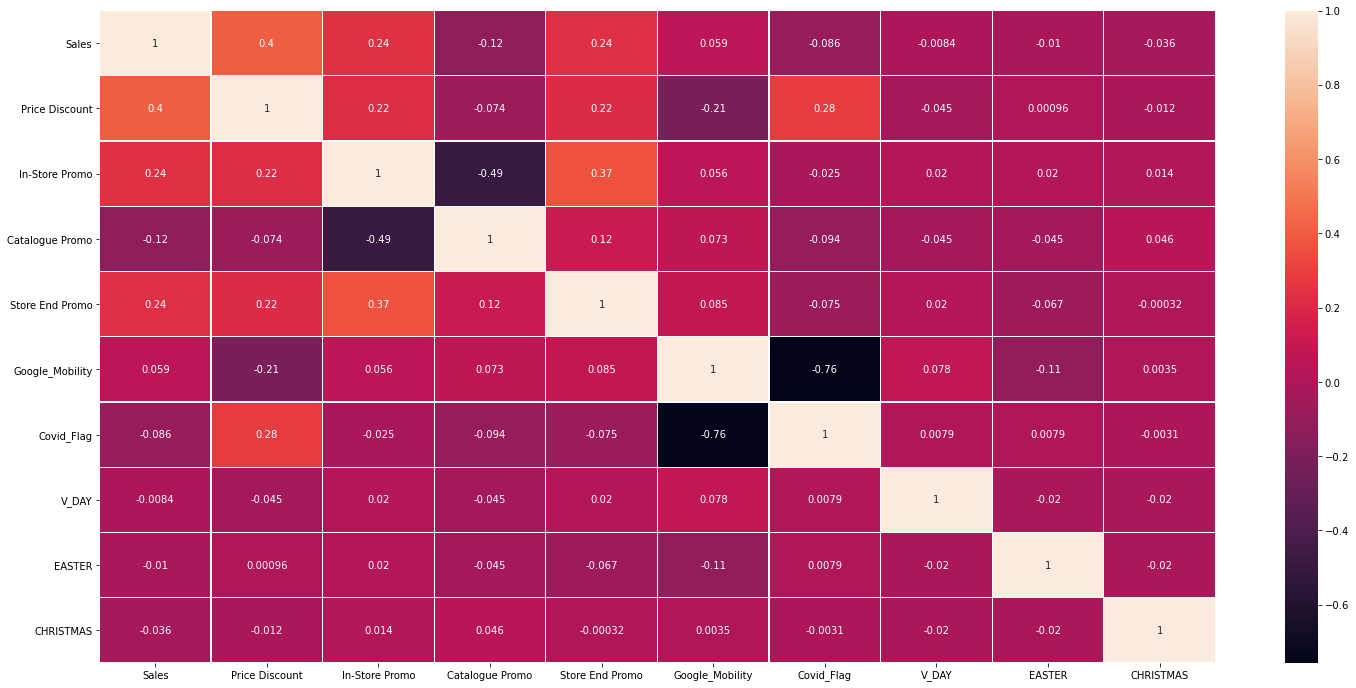

In [29]:
#Correlation between features
plt.figure(figsize = (25, 12))
sns.heatmap(df.corr(), annot = True, linewidths=.25) 

There is not much correlation between features, only 'Covid_Flag' & 'Google_Mobility' have relatively higher correlation.

## Null Values

In [30]:
Null_values = df.isnull().sum()
Null_values

Product            0
date               0
Sales              0
Price Discount     0
In-Store Promo     0
Catalogue Promo    0
Store End Promo    0
Google_Mobility    0
Covid_Flag         0
V_DAY              0
EASTER             0
CHRISTMAS          0
dtype: int64

There is no null values in our dataset.

## Outliers in numerical columns

In [31]:
def plot_hist(df, feature):
    plt.figure(figsize=(16,4))
    #Histogram
    plt.subplot(1,2,1)
    plt.hist(df[feature], alpha=0.5)
    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(df[feature])
    plt.show

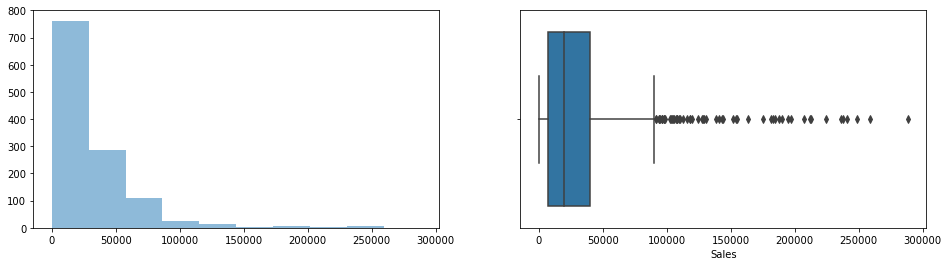

In [32]:
plot_hist(df,'Sales')

The sales column is skewed and have high volume of outliers, One way to deal with outliers is to take log. As presented below:

In [35]:
df['Sales'] = [np.log(x) for x in df['Sales']]

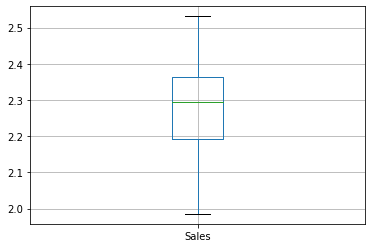

In [36]:
figure=df.boxplot(column='Sales')

taking log of the values, removed outliers.

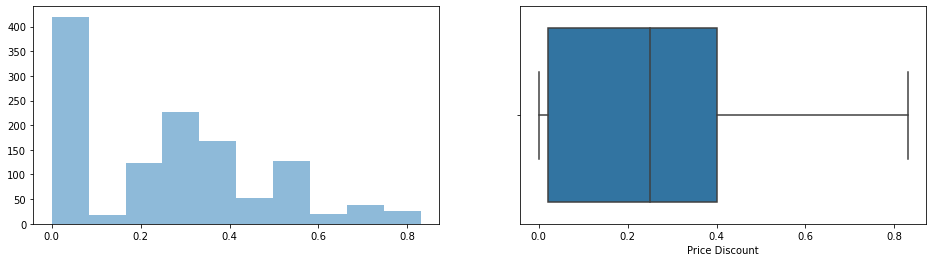

In [38]:
plot_hist(df,'Price Discount')

Variable "price discount" has no outliers.

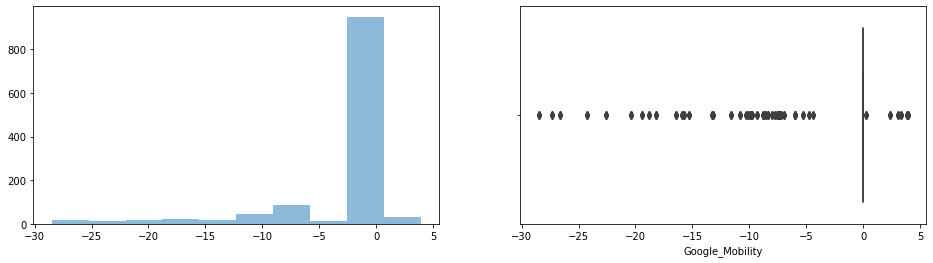

In [37]:
plot_hist(df,'Google_Mobility')
#figure=df.boxplot(column='Google_Mobility')   

The histogram and boxplot represents mostly unique values in the data, the only similar value is 0. Hence, we can not call them outliers but unique values.

The remaining columns are categorical, containing binary data. Hence no outliers present.